Import Library

In [ ]:
import pandas as pd #linear algebra
import numpy as np #data processing
import matplotlib.pyplot as plt #for plotting
from matplotlib import rcParams # customize the of plots
import seaborn as sb #for better visualization of data

data=pd.read_csv('/content/drive/MyDrive/winequality-red.csv')

Data Visualization

In [ ]:
data.head(10) #show part of data from top

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

In [ ]:
data.shape # show number of rows and column of datasets.

(1599, 12)

In [ ]:
data.describe() # generate descriptive statistics of a dataset

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [ ]:
print(data.isnull().sum()) #check whether the data contain missing value

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


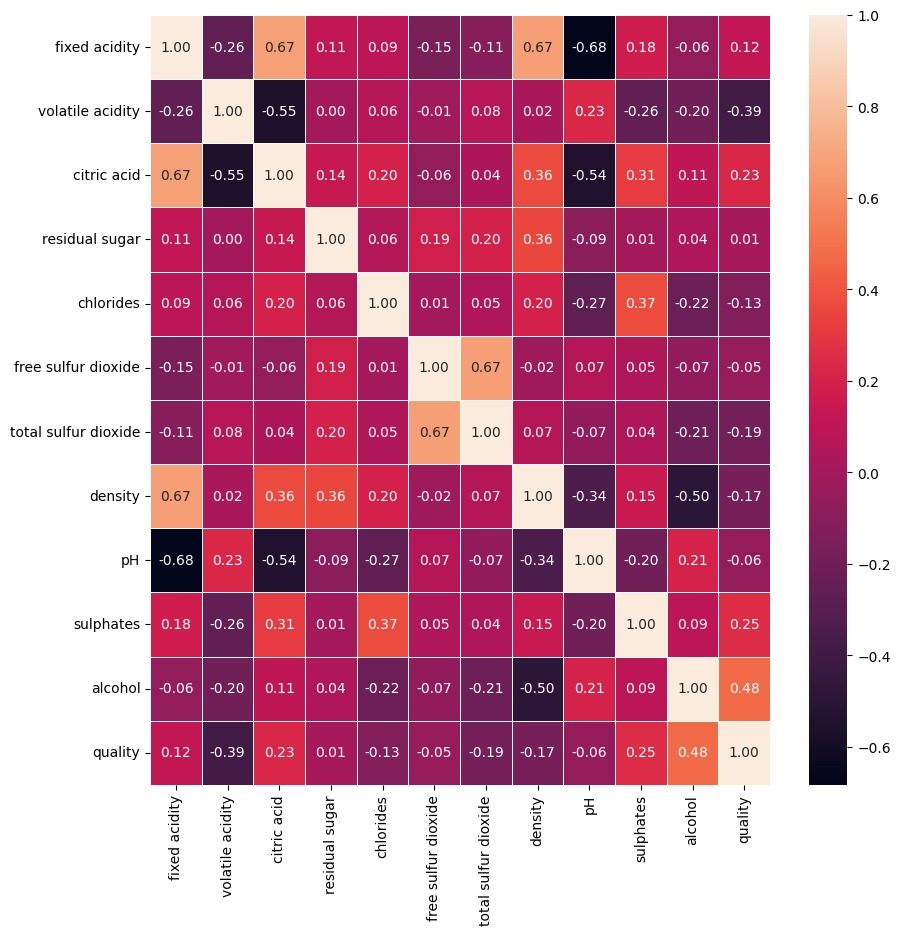

In [ ]:
# check the relationship between dependent and independent variables
#-1 means negative relationship between dependent and independent variables
# 0 means no relationship
# 1 means positve relationship
data.corr()
f, ax = plt.subplots(figsize = (10,10))
sb.heatmap(data.corr(), annot = True, linewidths=.5, fmt = ".2f", ax=ax)
plt.show()

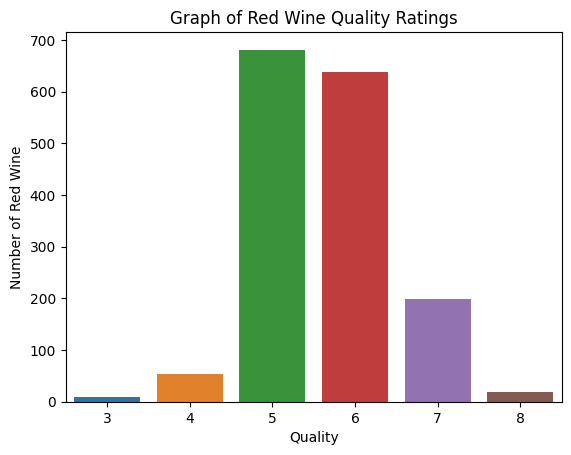

In [ ]:
sb.barplot(x=data['quality'].unique(), y=data['quality'].value_counts())
plt.xlabel("Quality")
plt.ylabel("Number of Red Wine")
plt.title("Graph of Red Wine Quality Ratings")
plt.show()

Data Preprocessing

Perform class reduction to simplify problem and improve model performance::

In [ ]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins = bins, labels = group_names)

**bins = (2, 6.5, 8)** defines the bin edges. Observations with quality values between 2 and 6.5 will be labeled as 'bad', and those between 6.5 and 8 will be labeled as 'good'.<br>

**group_names** = ['bad', 'good'] provides the labels for the two categories.<br>

**pd.cut(data['quality'], bins=bins, labels=group_names)** applies the binning to the 'quality' column of the DataFrame. The result is a new categorical variable 'quality' with values 'bad' or 'good' based on the specified bins and labels.

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_quality = LabelEncoder()
data['quality'] = label_quality.fit_transform(data['quality'])

**LabelEncoder** is used to convert categorical labels into numerical format. It assigns a unique integer to each unique category in the 'quality' column.<br>

**label_quality.fit_transform(data['quality'])** fits the label encoder on the 'quality' column and then transforms the categorical labels into numerical labels. The transformed labels replace the original 'quality' column in the DataFrame.

In [ ]:
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

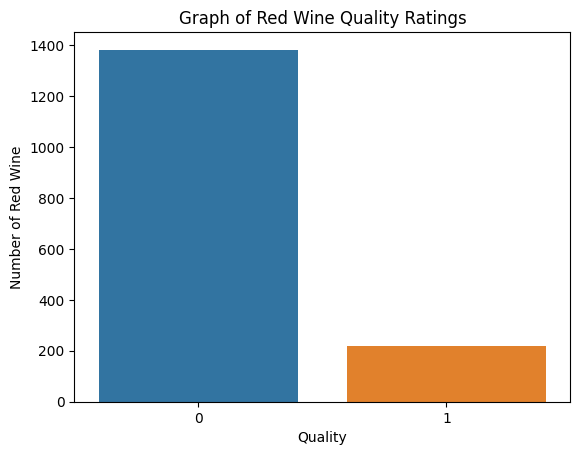

In [ ]:
sb.barplot(x=data['quality'].unique(), y=data['quality'].value_counts())
plt.xlabel("Quality")
plt.ylabel("Number of Red Wine")
plt.title("Graph of Red Wine Quality Ratings")
plt.show()

In [ ]:
#Feature Variables
x = data.drop('quality',axis=1)
#Target Variable
y = data['quality']

from sklearn.model_selection import train_test_split # used to split dataset into training set and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state=42)

PCA is used to perform dimensinality reduction.<br>
It reduce number of features in the dataset while retaining the most important information

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

[link text](https://)Implementing Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(x_train, y_train)
y_pred = DecisionTree.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[383,  30],
       [ 35,  32]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       413
           1       0.52      0.48      0.50        67

    accuracy                           0.86       480
   macro avg       0.72      0.70      0.71       480
weighted avg       0.86      0.86      0.86       480



In [ ]:
accuracy_score = metrics.accuracy_score(y_test, y_pred)
print(accuracy_score)

0.8645833333333334


Hyperparameter Tuning<br>


In [ ]:
from sklearn.model_selection import GridSearchCV
grid_params = {
    'max_depth' : range(5,50,10),
    'min_samples_leaf' : range(20,200,40),
    'min_samples_split' : range(20,200,40),
    'criterion' : ['gini','entropy']
}

grid_search = GridSearchCV(DecisionTree, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 50, 10),
                         'min_samples_leaf': range(20, 200, 40),
                         'min_samples_split': range(20, 200, 40)},
             verbose=1)

**grid_params** is a dictionary specifying the hyperparameter values to be explored. The keys are hyperparameter names, and the values are lists of hyperparameter values to search over.<br>

**GridSearchCV** is used to perform a search over the hyperparameter grid using cross-validated performance. It takes the model, the parameter grid , the number of folds for cross-validation, the number of CPU cores to use in parallel, and the verbosity level.

In [ ]:
DecisionTree = grid_search.best_estimator_
y_pred = DecisionTree.predict(x_test)

In [ ]:
accuracy_score = metrics.accuracy_score(y_test, y_pred)
print(accuracy_score)

0.8479166666666667


In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 60, 'min_samples_split': 140}
0.876665598975016


ADA Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator = DecisionTree)

parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(ada, parameters, n_jobs = -1, cv = 10, verbose = 1)
grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


GridSearchCV(cv=10,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                                                min_samples_leaf=60,
                                                                                min_samples_split=140)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

ADA Boost<br>
**n_estimators**<br>
This parameter represents the number of weak learners (base estimators) that are sequentially trained during the boosting process.<br>
**Learning_rate**<br>
This parameter controls the contribution of each weak learner to the final prediction. A smaller learning rate typically requires more weak learners.<br>
**Algorithm**<br>
This parameter specifies the boosting algorithm to use.<br>
'SAMME' is a discrete AdaBoost algorithm, and 'SAMME.R' is a real AdaBoost algorithm.

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 200}
0.8909588159588161


Final Model

In [ ]:
ada = AdaBoostClassifier(base_estimator = DecisionTree, algorithm= "SAMME.R", learning_rate= 1, n_estimators= 200)
ada.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                         min_samples_leaf=60,
                                                         min_samples_split=140),
                   learning_rate=1, n_estimators=200)

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[386  27]
 [ 46  21]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       413
           1       0.44      0.31      0.37        67

    accuracy                           0.85       480
   macro avg       0.67      0.62      0.64       480
weighted avg       0.83      0.85      0.84       480



In [ ]:
accuracy_score = metrics.accuracy_score(y_test, y_pred)
print(accuracy_score)

0.8479166666666667
